### **Twitter Airline Sentiment**


## Sentiment Analysis Project using LSTM
This Project utilizes Long Short-Term Memory (LSTM) technology for sentiment analysis on Twitter data collected in February 2015.By classifying tweets into positive, negative, or neutral sentiments using LSTM. Subsequently, LSTM is employed to further analyze negative tweets, identifying specific reasons for dissatisfaction, such as late flight or rude service.


### Library Imports

In [ ]:
#imported nessasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

### Data Loading and Analysis

In [ ]:
#Read the csv file
df = pd.read_csv('/content/Tweets.csv')

In [ ]:
#Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.shape

(14640, 15)

In [ ]:
#df.head(10)

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

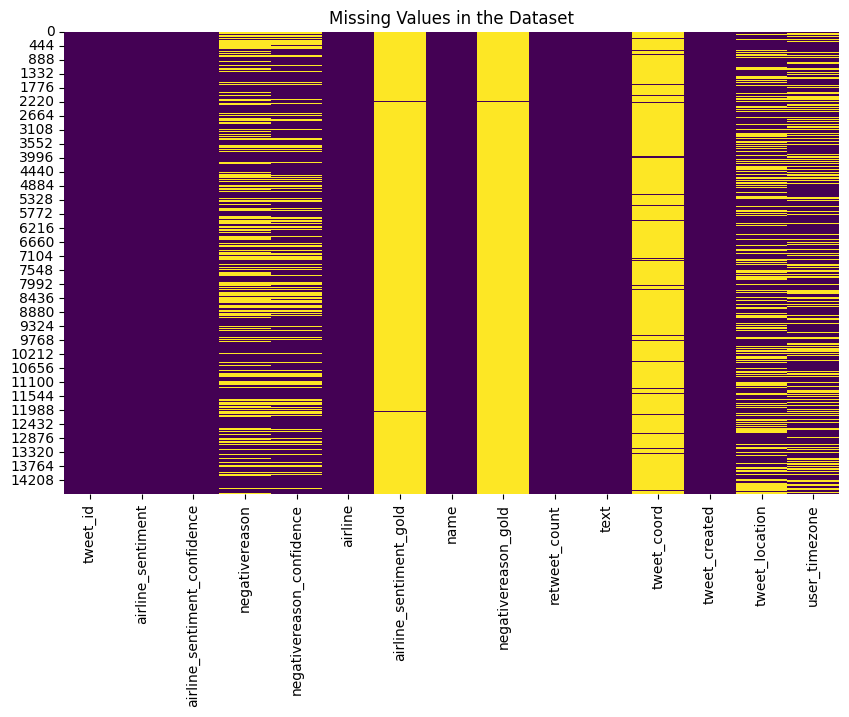

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

### Handling Missing Values

In [ ]:
df.fillna(value=0, inplace=True)


In [ ]:
df.fillna(method='ffill', inplace=True)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,0,0.0000,Virgin America,0,cairdin,0,0,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,0,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,0,0.0000,Virgin America,0,jnardino,0,0,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,0,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,0,0.0000,Virgin America,0,yvonnalynn,0,0,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,jnardino,0,0,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,0,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,jnardino,0,0,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,0,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,0,0.0000,American,0,KristenReenders,0,0,@AmericanAir thank you we got on a different f...,0,2015-02-22 12:01:01 -0800,0,0
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,0,itsropes,0,0,@AmericanAir leaving over 20 minutes Late Flig...,0,2015-02-22 11:59:46 -0800,Texas,0
14637,569587242672398336,neutral,1.0000,0,0.0000,American,0,sanyabun,0,0,@AmericanAir Please bring American Airlines to...,0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",0
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,0,SraJackson,0,0,"@AmericanAir you have my money, you change my ...",0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
#df.head(10)

In [ ]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

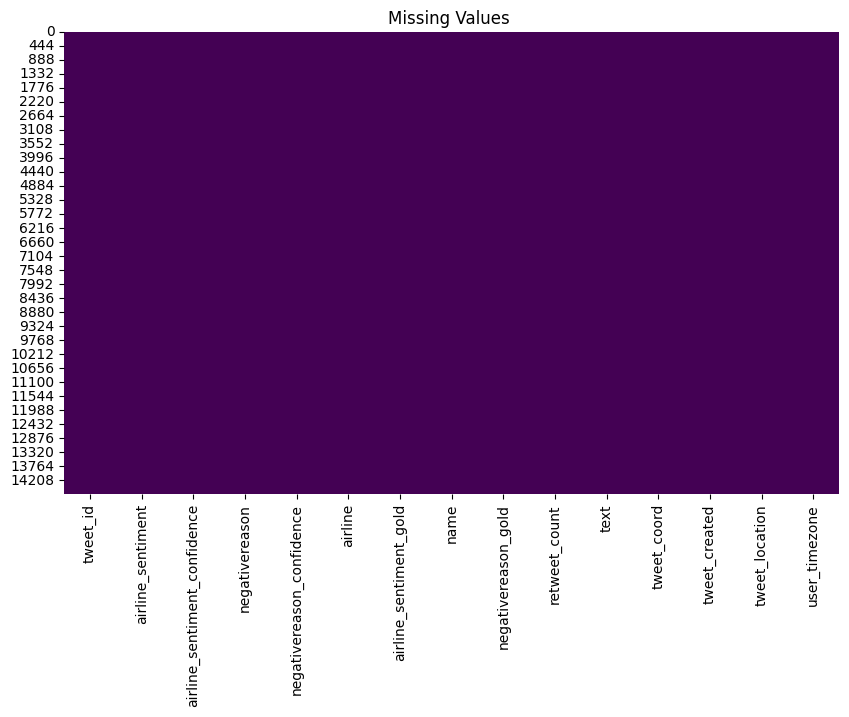

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values ')
plt.show()

In [ ]:
#only considering important columns
df = df[['text', 'airline_sentiment']]

In [ ]:
df


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


### Data Exploration and Visualization

<Axes: xlabel='airline_sentiment'>

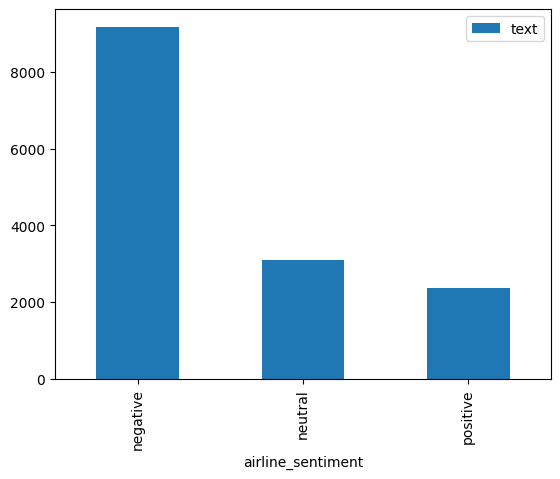

In [ ]:
# The distribution of sentiments
df.groupby('airline_sentiment').count().plot(kind='bar')

In [ ]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['text']])

# The distribution of tweet text lengths
#tweet_len.plot(kind='box')

### Text Length Analysis for Positive and Negative Sentiments

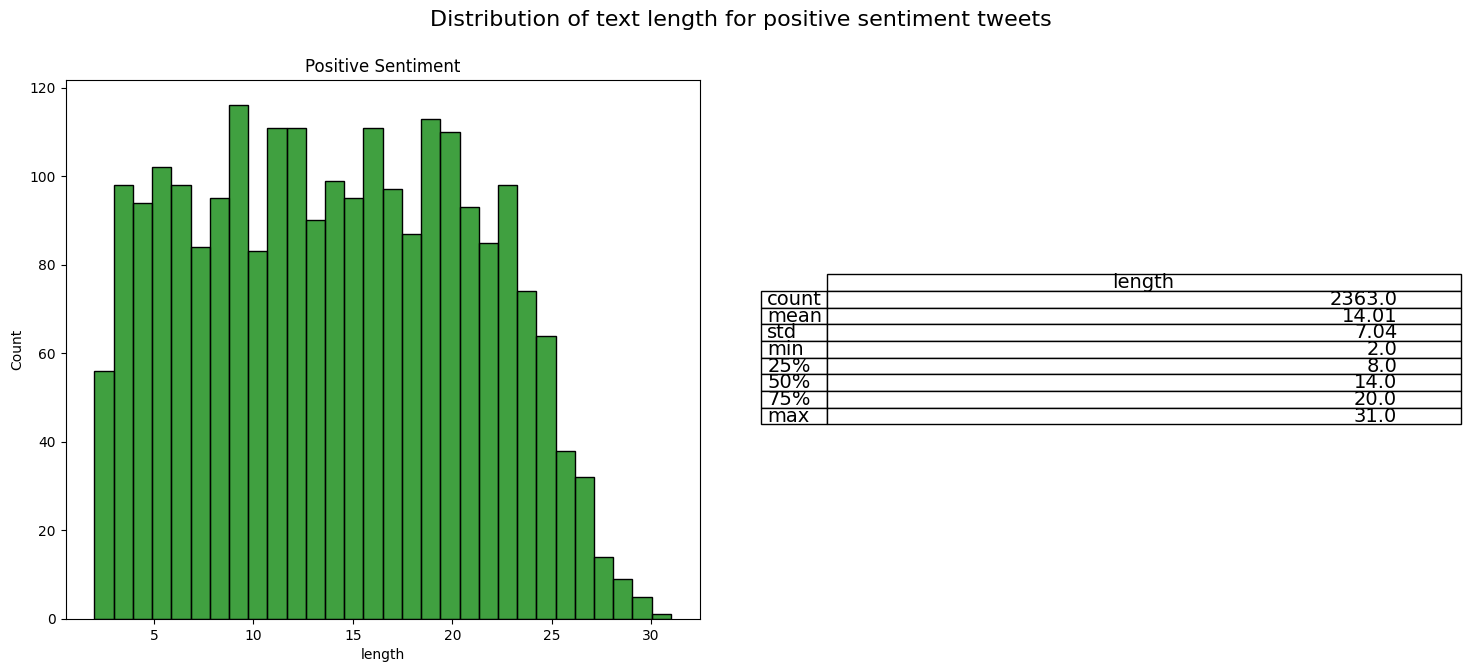

In [ ]:


# Assuming your DataFrame is df and you have a 'text' column
df['length'] = df[df['airline_sentiment'] == 'positive']['text'].apply(lambda x: len(x.split()))

# Now you can proceed with the visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

positive_data = df[df['airline_sentiment'] == 'positive']

# Plotting histogram for positive sentiment tweets
sns.histplot(positive_data['length'], ax=axes[0], color='green', bins=30)
axes[0].set_title('Positive Sentiment')

# Descriptive statistics for positive sentiment tweets
describe_positive = positive_data['length'].describe().to_frame().round(2)

# Table for descriptive statistics for positive sentiment tweets
axes[1].axis('off')
table_positive = axes[1].table(cellText=describe_positive.values, rowLabels=describe_positive.index,
                              colLabels=describe_positive.columns, loc='center')
table_positive.set_fontsize(14)

fig.suptitle('Distribution of text length for positive sentiment tweets', fontsize=16)
plt.show()


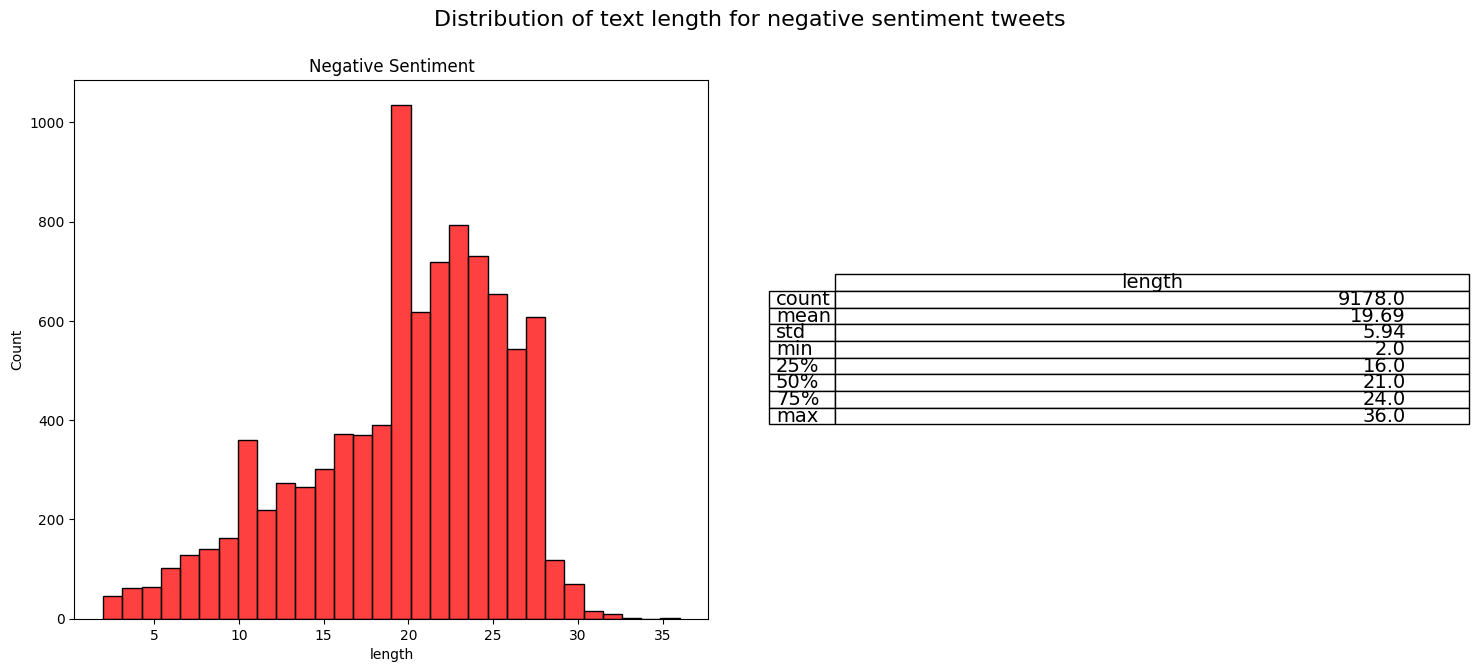

In [ ]:
# Assuming your DataFrame is df and you have a 'text' column
df['length'] = df[df['airline_sentiment'] == 'negative']['text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

negative_data = df[df['airline_sentiment'] == 'negative']

# Plotting histogram for negative sentiment tweets
sns.histplot(negative_data['length'], ax=axes[0], color='red', bins=30)
axes[0].set_title('Negative Sentiment')

# Descriptive statistics for negative sentiment tweets
describe_negative = negative_data['length'].describe().to_frame().round(2)

# Table for descriptive statistics for negative sentiment tweets
axes[1].axis('off')
table_negative = axes[1].table(cellText=describe_negative.values, rowLabels=describe_negative.index,
                              colLabels=describe_negative.columns, loc='center')
table_negative.set_fontsize(14)

fig.suptitle('Distribution of text length for negative sentiment tweets', fontsize=16)
plt.show()


### Pie Chart of Sentiment Distribution

In [ ]:
import plotly.express as px
fig = px.pie(df, names='airline_sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                     text airline_sentiment  \
0                    @VirginAmerica What @dhepburn said.           neutral   
1      @VirginAmerica plus you've added commercials t...          positive   
2      @VirginAmerica I didn't today... Must mean I n...           neutral   
3      @VirginAmerica it's really aggressive to blast...          negative   
4      @VirginAmerica and it's a really big bad thing...          negative   
...                                                  ...               ...   
14635  @AmericanAir thank you we got on a different f...          positive   
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative   
14637  @AmericanAir Please bring American Airlines to...           neutral   
14638  @AmericanAir you have my money, you change my ...          negative   
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral   

       airline_sentiment_encoded 

### Word Cloud Generation

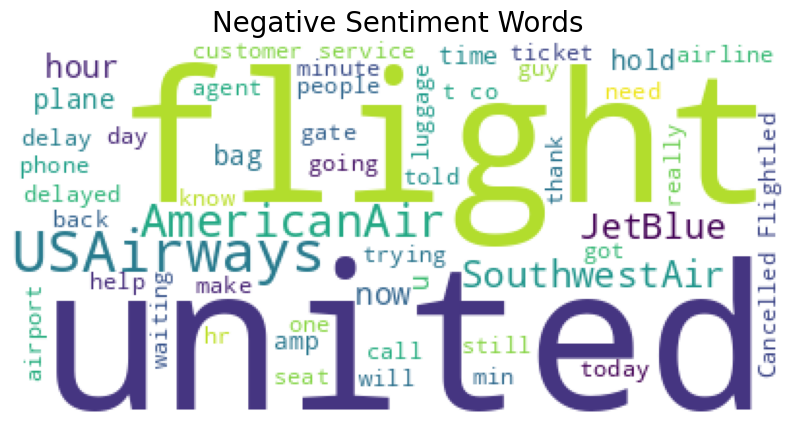

In [ ]:
# Negative tweet words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcount_gen(df, 'negative')



### Tokenization and Padding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
total_words = len(tokenizer.word_index) + 1
vocab_size = len(tokenizer.word_index) + 1


sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences)

In [ ]:
# Encode sentiment labels
label_encoder = LabelEncoder()
df['airline_sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['airline_sentiment_encoded'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape


(11712, 36)

In [ ]:
X_train.shape

(11712, 36)

In [ ]:
X_test.shape

(2928, 36)

In [ ]:
y_train.shape


(11712,)

In [ ]:
y_test.shape

(2928,)

### Model Building and Training

In [ ]:
# LSTM Model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train.shape[1]),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### Model Training and Evaluation

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
293/293 [==============================] - 20s 67ms/step - loss: -44.7490 - accuracy: 0.7713 - val_loss: -26.0233 - val_accuracy: 0.6547
Epoch 2/10
293/293 [==============================] - 18s 62ms/step - loss: -49.0567 - accuracy: 0.7727 - val_loss: -19.3517 - val_accuracy: 0.6517
Epoch 3/10
293/293 [==============================] - 17s 59ms/step - loss: -53.0380 - accuracy: 0.7649 - val_loss: -29.1089 - val_accuracy: 0.6236
Epoch 4/10
293/293 [==============================] - 18s 62ms/step - loss: -58.0950 - accuracy: 0.7786 - val_loss: -28.6192 - val_accuracy: 0.6291
Epoch 5/10
293/293 [==============================] - 17s 59ms/step - loss: -60.4843 - accuracy: 0.7786 - val_loss: -21.6743 - val_accuracy: 0.6125
Epoch 6/10
293/293 [==============================] - 18s 61ms/step - loss: -64.1633 - accuracy: 0.7708 - val_loss: -37.1135 - val_accuracy: 0.6560
Epoch 7/10
293/293 [==============================] - 21s 70ms/step - loss: -70.8868 - accuracy: 0.7836 - val_lo

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

92/92 [==============================] - 2s 17ms/step - loss: -40.6918 - accuracy: 0.6752
Test Accuracy: 0.6752049326896667


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype('int')

92/92 [==============================] - 2s 12ms/step


### Plot Training History

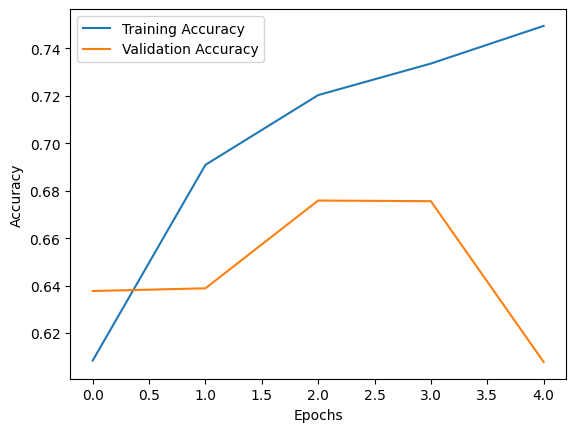

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()